In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as optimize

In [2]:
data = pd.read_csv('Database/MediaMovilData.csv',sep=',')
#data = pd.read_csv('Database/IRO.csv',sep=',')

In [3]:
x = data.Ventas

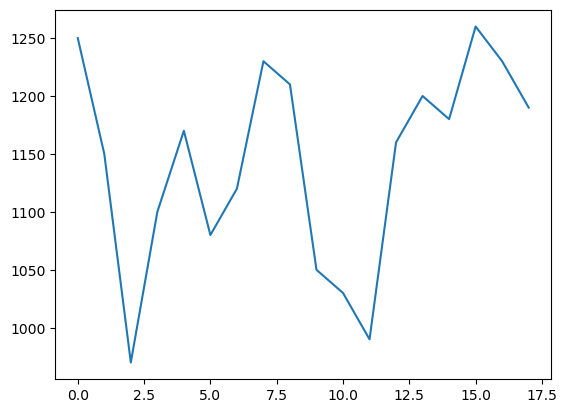

In [4]:
plt.plot(x)

In [5]:
def GetMediaMovil(x,n):# n dice cuantos dias vamos a tomar para hacer la prediccion
    media = np.zeros( len(x) +1 ) # el +1 es para la prediccion
    for i in range ( len(media) ):
        sum_ = 0.
        #print(x)
        #print("i previo: ",i,f"\n---")
        if i >= n :
            for j in range(i-n, i):
                #print("i: ",i,f"\nj: ",j,f"\ni-n: ",(i-n),f"\nn: ",(n),f"\n....")
                sum_+=x[j]
                #print("SUMA: ",sum_)
            media[i]=sum_/n
        else:
            media[i]=x[i]
    return media

In [6]:
media = GetMediaMovil(x,3)

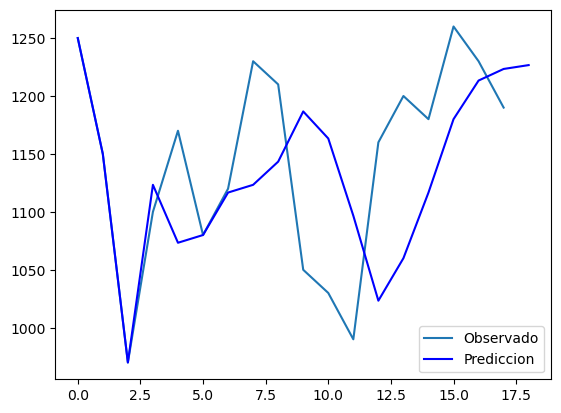

In [7]:
plt.plot(x, label='Observado')
plt.plot(media,color='b',label='Prediccion')
plt.legend()

In [8]:
def GetWeightedMediaMovil(x,w):
    n = len(w)
    media = np.zeros( len(x) +1 )
    for i in range ( len(media) ):
        sum_ = 0.
        if i >= n :
            k = 0
            for j in range(i-n, i):
                sum_+=w[k]*x[j] # es como la "frecuencia relativa"
                k+=1
            media[i]=sum_
        else:
            media[i]=x[i]
    return media

In [9]:
######################################
#IMPORTANTE LOS PESOS DEBEN SER MAYOR A CERO Y LA SUMA TOTAL DEBE SER 1
######################################

In [10]:
w = np.array([0.2,0.2,0.6])
Wmedia = GetWeightedMediaMovil(x,w)

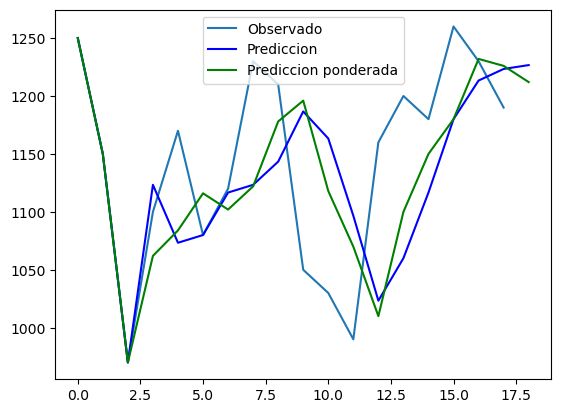

In [11]:
plt.plot(x, label='Observado')
plt.plot(media,color='b',label='Prediccion')
plt.plot(Wmedia,color='g',label='Prediccion ponderada')
plt.legend()

### Debemos encontrar la mejor combinacion de PESOS para tener la mejor prediccion (Estimacion de parametros)
#### minimizando el error de lo que se vende y lo que el modelo predice

In [12]:
# necesitamos una funcion costo, o metrica => Error absoluto medio mape
def GetError(x,y): #x lo que se ve y y lo que el modelo predice
    return np.mean(np.abs(x-y)) #Distancia

In [13]:
#Error absoluto medio

In [14]:
GetError(x,Wmedia[:-1]) #Quitar el ultimo

57.22222222222222

In [15]:
def Cost(w):
    Wmedia = GetWeightedMediaMovil(x,w)
    Error = GetError(x,Wmedia[:-1])
    return Error

In [25]:
w0 = np.array([0.2,0.2,0.6])

In [26]:
bounds = { (0,1),(0,1),(0,1) }
constraints = ( {'type':'eq', 'fun':lambda w: np.sum(w)-1 } )
result = optimize.minimize( Cost, w0, options={'disp':True},  bounds = bounds,constraints = constraints)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.51852324837884
            Iterations: 26
            Function evaluations: 164
            Gradient evaluations: 26


In [27]:
wopt = result.x
wopt = np.round(wopt,2)
WMediaOpt = GetWeightedMediaMovil(x,wopt)
wopt

array([0.13, 0.  , 0.87])

In [19]:
# mejor prediccion a las ventas reales

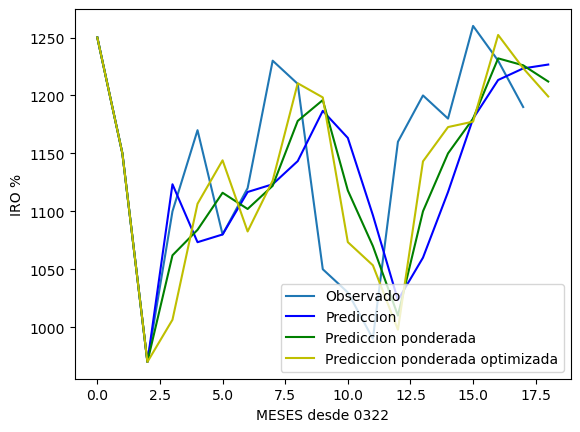

In [20]:
plt.plot(x[:].tolist(), label='Observado')
plt.plot(media[:].tolist(),color='b',label='Prediccion')
plt.plot(Wmedia[:].tolist(),color='g',label='Prediccion ponderada')
plt.plot(WMediaOpt[:].tolist(),color='y',label='Prediccion ponderada optimizada')
xlocs, xlabs = plt.xticks()
plt.xlabel('MESES desde 0322')
plt.ylabel('IRO %')
#for i, v in enumerate(WMediaOpt[:]):
#    plt.text(i, v , str(round(v,2)))
#for i, v in enumerate(x[:]):
#    plt.text(i, v , str(round(v,2)))
#for i, v in enumerate(Wmedia[:]):
#    plt.text(i, v , str(round(v,2)))
plt.legend()
plt.show()


In [21]:
WMediaOpt[-1]

1199.1

In [22]:
WMediaOpt[10:].tolist()

[1073.4,
 1053.4,
 997.8,
 1143.1000000000001,
 1172.7,
 1177.3999999999999,
 1252.2,
 1223.5,
 1199.1]

In [23]:
x[10:].tolist()

[1030, 990, 1160, 1200, 1180, 1260, 1230, 1190]